# Breast cancer image classication 

#### Import different libraries

In [46]:
# # !pip install catboost
# !pip install mlens
# !pip install imbalanced-learn==0.6.0

In [47]:
import pickle
import random
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Import models
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')


In [48]:
random.seed(42)

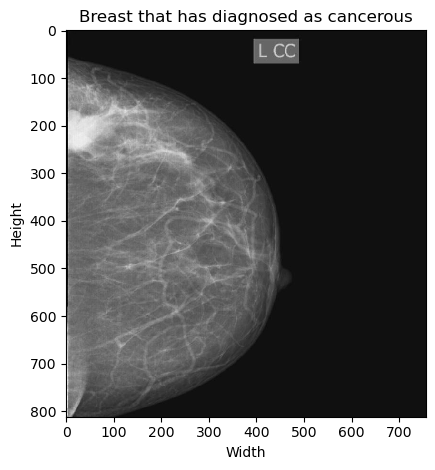

In [49]:
img = io.imread("Benign/ben (1).JPG")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Breast that has diagnosed as cancerous')
io.imshow(img)

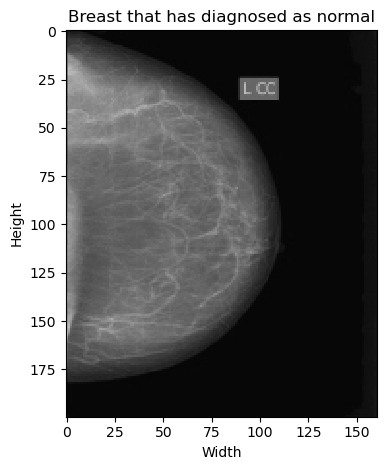

In [50]:
img = io.imread("normal/nor (107).jpeg")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Breast that has diagnosed as normal')
io.imshow(img)

In [51]:
#from google.colab import drive # Link your drive if you are a colab user
#drive.mount('/content/drive') 

In [52]:
# Load data in pickle format
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [53]:
random.shuffle(data)
features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

# Checking the imbalanced

In [54]:
normal= len(np.where(np.array(labels) == 1)[0])
benign = len(np.where(np.array(labels) == 0)[0])


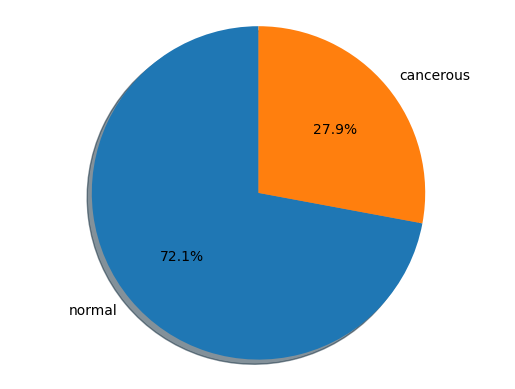

In [55]:
label = 'normal', 'cancerous'
sizes = [normal, benign]

# plt.title("")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Handling Imbalanced data

In [56]:
oversample = SMOTE()

In [57]:
features, labels = oversample.fit_resample(features, labels)

In [58]:
normal= len(np.where(np.array(labels) == 1)[0])
benign = len(np.where(np.array(labels) == 0)[0])
benign

733

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.200)

# create a list of models

In [60]:
def get_models():
    models = list()
    #models.append(LogisticRegression(class_weight={0:0.73,1:0.27},C=20,penalty="l2"))
    #models.append(DecisionTreeClassifier(max_depth=10,max_features=None, max_leaf_nodes=None,
           #min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
           #min_weight_fraction_leaf=0.0, random_state=None,splitter="best"))
    #models.append(SVC(gamma='scale', probability=True))
    #models.append(KNeighborsClassifier(leaf_size=5, n_neighbors=7, p=1))
    #models.append(GaussianNB())
    models.append(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.02,
                   n_estimators=100, random_state=42))
    models.append(RandomForestClassifier(n_estimators = 100,max_depth=10, min_samples_split = 2,
                                         min_samples_leaf= 1, max_features = 'sqrt',random_state=7,
                                          bootstrap=False))
    return models

# fit all models on the training dataset

In [61]:
def fit_base_models(features,labels, models):
    for model in models:
        model.fit(features,labels)

# evaluate a list of models on a dataset

In [62]:
accuracies = dict()
pd.DataFrame([accuracies])
def evaluate_models(features,labels, models, model_names):
    target_names = ["benign", "normal"]
    for model, name in zip(models, model_names):
        yhat = model.predict(features)
        print("Model : ",name)
        print(classification_report(labels, yhat, target_names=target_names))
        conf_matrix= confusion_matrix(labels, yhat)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.title(f'Confusion matrix for {name}')
        plt.show()
        acc = accuracy_score(labels, yhat)* 100
        accuracies[model.__class__.__name__] = acc
    return accuracies


def display_results(accuracy):
    df = pd.DataFrame(list(accuracy.items()))
    update_df = df.rename(columns={0:'Classifier', 1: 'Accuracy score'})
    return update_df #.set_index('Classifier')      

# get models

In [63]:
models = get_models()

# fit models

In [64]:
fit_base_models(features,labels, models)

# evaluate models

Model :  AdaBoost Classifier
              precision    recall  f1-score   support

      benign       0.96      0.97      0.97       131
      normal       0.98      0.97      0.97       163

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



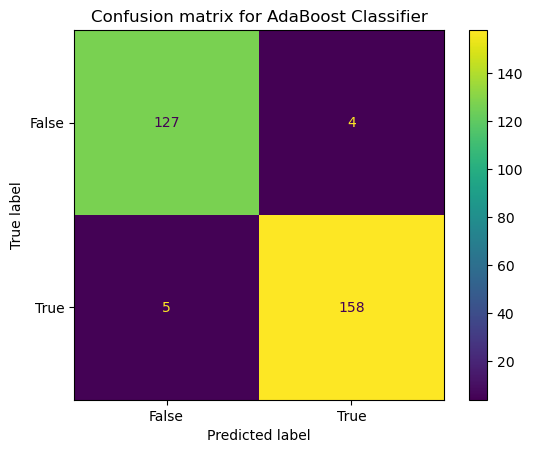

Model :  Random Forest Classifier
              precision    recall  f1-score   support

      benign       1.00      0.82      0.90       131
      normal       0.87      1.00      0.93       163

    accuracy                           0.92       294
   macro avg       0.94      0.91      0.92       294
weighted avg       0.93      0.92      0.92       294



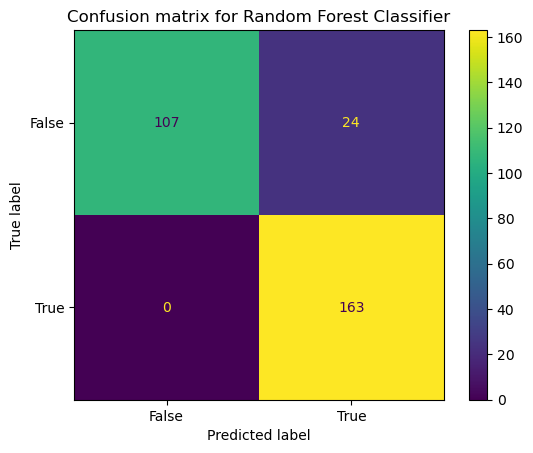

,Classifier,Accuracy score
1,RandomForestClassifier,91.836735
0,AdaBoostClassifier,96.938776


In [65]:
# evaluate_models(x_test, y_test, models)
#model_names = ["Decision Tree Classifier", "SVC","K Neighbors Classifier","Naive Bayes","AdaBoost Classifier","Random Forest Classifier"]
model_names = ["AdaBoost Classifier","Random Forest Classifier"]
base_accuracy = evaluate_models(x_test, y_test, models, model_names)
display_results(base_accuracy).sort_values('Accuracy score')
#display_results_conf(base_accuracy)["Confusion Matrix"]


Model name  :  AdaBoost Classifier
Accuracy : 96.93877551020408 % 
Actual class is :  normal
Predicted class is : normal


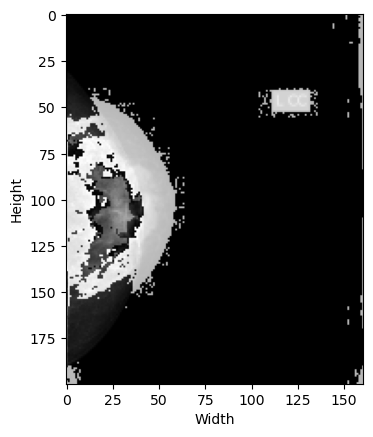

Model name  :  Random Forest Classifier
Accuracy : 91.83673469387756 % 
Actual class is :  normal
Predicted class is : normal


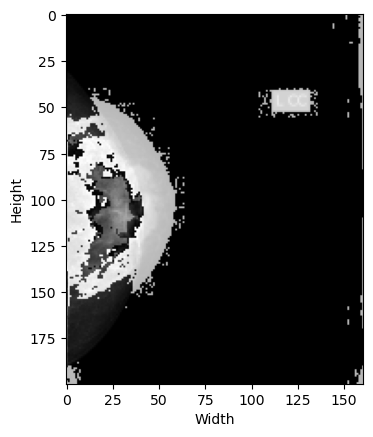

In [66]:
for model, name in zip(models, model_names):
    prediction = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    print("Model name  : ", name)
    print("Accuracy : {} % ".format(accuracy*100))
    print("Actual class is : ", label[y_test[0]])
    print('Predicted class is :', label[prediction[0]])

    breast = x_test[0].reshape(200,161)
    plt.imshow(breast,cmap= 'gray')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

# Graphical representation of model

In [67]:
import plotly.express as px


fig = px.bar(display_results(base_accuracy).sort_values('Accuracy score'), y='Accuracy score', x='Classifier',color='Classifier', text_auto='.4s',
            title="Comparison of accuracies for different machine models",width=1000)
fig.update_traces(textfont_size=13, textangle=30, textposition="outside", cliponaxis=False)
fig.update_xaxes(tickangle=-45)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()